In [6]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np 

In [105]:
class ThresholdSwitch():
    R_off: float = 5e10
    R_on: float = 3e5
    V_th: float = 0.45
    V_hold: float = 0.05
    t_on: float = 1e-8
    t_off: float = 1e-8

    def __init__(self,  R_off = R_off, R_on = R_on, V_th = V_th, V_hold = V_hold, t_on = t_on, t_off = t_off) -> None:
        self.R_off = R_off
        self.R_on = R_on
        self.V_th = V_th
        self.V_hold = V_hold
        self.t_off = t_off
        self.t_on = t_on
        self.state = 'off'

    def get_resistance(self, time, voltage):
        self.R = self.R_off
        if (self.state == 'off') and (voltage < self.V_th):
            self.R = self.R_off
            return self.R
        elif (self.state == 'off') and (voltage > self.V_th):
            self.state = 'switching_on'
            self.time_on = time
            self.R = self.R_off
            return self.R
        elif (self.state == 'switching_on') and (time < (self.time_on + self.t_on)):
            self.R = self.R_off + (self.R_on - self.R_off) * (time - self.time_on) / (0.9 * self.t_on)
            if self.R < self.R_on:
                self.R = self.R_on
                self.state = 'on'
            return self.R
        elif (self.state == 'on') and (voltage > self.V_hold):
            self.R = self.R_on
            return self.R
        elif (self.state == 'on') and (voltage < self.V_hold):
            self.state = 'switching_off'
            self.time_off = time
            self.R = self.R_on
            return self.R
        elif (self.state == 'switching_off') and (time < self.time_off + self.t_off) :
            self.R = self.R_on + (self.R_off - self.R_on) * (time - self.time_off) / (0.9 * self.t_off)
            if self.R > self.R_off:
                self.R > self.R_off
                self.state = 'off' 
            return self.R

3.549807107757945

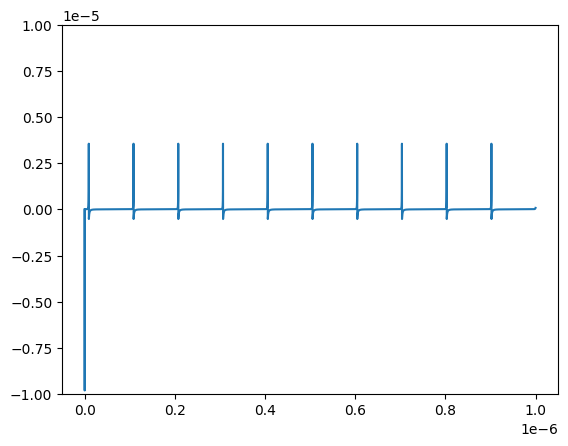

In [200]:
time = np.linspace(0, 1e-6, 10000)
dt = time[1] - time[0]
ts = ThresholdSwitch(t_off=100e-9, t_on=10e-9)

E = 1
R_r = 1e9
C = 1e-15

R_ts = [ts.R_off]
U_ts = [0]
I_ts = [0]
I_C = [0]
I = [0]
U_r = [0]
U_c = [0]

for i in range(1, len(time)):
    I.append(E / (R_r + R_ts[i-1]))
    U_ts.append(I[i] * R_ts[i-1])
    I_C.append(C * (U_ts[i] - U_ts[i-1]) / dt)
    R_ts.append(ts.get_resistance(time[i], U_ts[i]))
    I_ts.append(I[i] - I_C[i])
    U_r.append(E - U_ts[i-1])

plt.plot(time, (I_ts))
#plt.xlim([0.2e-9,2e-8])
plt.ylim([-0.00001, 0.00001])
np.max(I_ts) * 1e6